# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>


**Github project link** - https://github.com/rathorsuraj6/Retail-Sales-Prediction-ML-project/upload/main

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

## Loading Libraries & Data

In [ ]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import missingno as msno
import matplotlib
import matplotlib.pylab as pylab
import missingno as msno
%matplotlib inline
matplotlib.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8,6
from scipy.stats import zscore
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


In [ ]:
#Loading Rossman Dataset
url = "https://github.com/nitin7478/Retail-Sales-Prediction-Capstone-ML-Final/raw/main/rossman.zip"
url_store = "https://github.com/nitin7478/Retail-Sales-Prediction-Capstone-ML-Final/raw/main/store.csv"
rossman_df= pd.read_csv(url, low_memory= False)

In [ ]:
#Loading Store Dataset
store_df=pd.read_csv(url_store, low_memory=False)

## **Analysing the Rossman Dataset**

In [ ]:
rossman_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [ ]:
rossman_df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


##### **Checking Information about Dataset**

In [ ]:
rossman_df.shape

(1017209, 9)

In [ ]:
#Checking info of data as data types and rows and cols
rossman_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [ ]:
#Checking Null Values
rossman_df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

**Summary Statastics Of Dataset**

In [ ]:
#Summary Statastics
rossman_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
#No. Of Stores in the Dataset
rossman_df.Store.nunique()

1115

In [ ]:
# Value_counts of StateHoliday Column
rossman_df.StateHoliday.value_counts()

0    986159
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [ ]:
print(rossman_df['Date'].min(),'initial')
print(rossman_df['Date'].max(),'final')

2013-01-01 initial
2015-07-31 final


**This tells us we have a data of almost 3 years.**

In [ ]:
# extract year, month, day and week of year from "Date"

rossman_df['Date']=pd.to_datetime(rossman_df['Date'])
rossman_df['Year'] = rossman_df['Date'].apply(lambda x: x.year)
rossman_df['Month'] = rossman_df['Date'].apply(lambda x: x.month)
rossman_df['Day'] = rossman_df['Date'].apply(lambda x: x.day)
rossman_df['WeekOfYear'] = rossman_df['Date'].apply(lambda x: x.weekofyear)

In [ ]:
rossman_df.sort_values(by=['Date','Store'],inplace=True,ascending=[False,True])
rossman_df.head(2)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31


## **EDA On Rossman Dataset**

#### **Heatmap of the Rossman Dataset**

<ipython-input-144-0c81a237bb85>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = rossman_df[rossman_df.columns].corr()


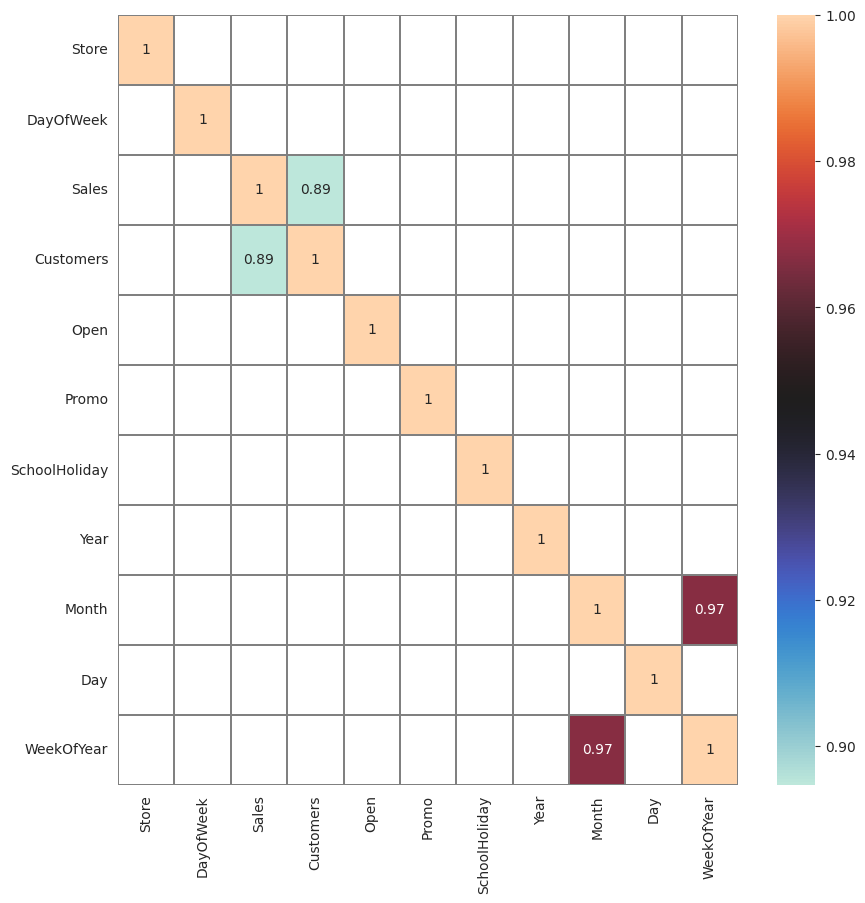

In [ ]:
plt.figure(figsize=(10,10))
df_corr = rossman_df[rossman_df.columns].corr()
mask = df_corr.where(abs(df_corr)>=.70).isna()

sns.heatmap(df_corr ,mask = mask , annot = True , cmap ='icefire', linewidth = 0.2, linecolor = 'grey').set_facecolor('white')

In above graph , we can see Customers and sales are positive correlated

**As we can see that in the graph given below that Stores mainly closed on Sunday**

<Axes: xlabel='DayOfWeek', ylabel='count'>

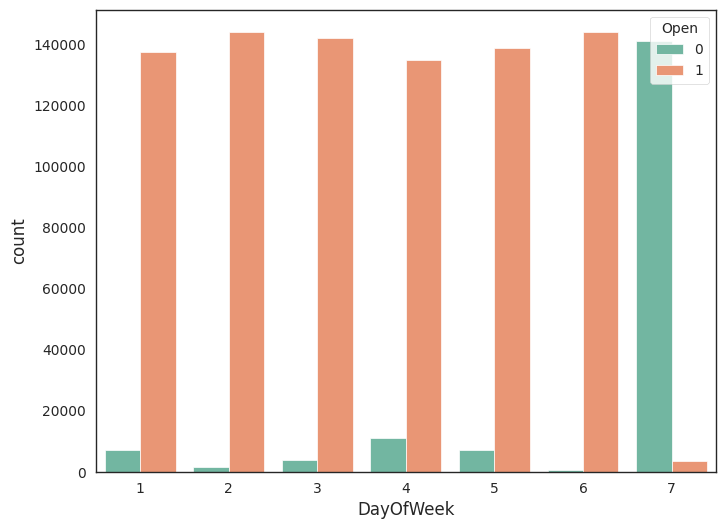

In [ ]:
custom_palette = sns.color_palette("Set2")
sns.countplot(x='DayOfWeek',hue='Open',data=rossman_df, palette=custom_palette )

**Sales Are nearly doubled High When Promo is Running**

<Axes: xlabel='Promo', ylabel='Sales'>

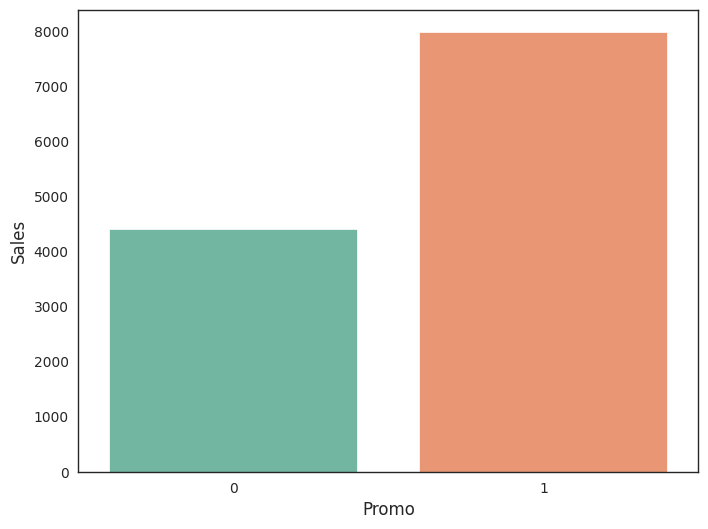

In [ ]:
#Impact of promo on sales
custom_palette = sns.color_palette("Set2")
Promo_sales = pd.DataFrame(rossman_df.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'] , palette = custom_palette)

**As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.**

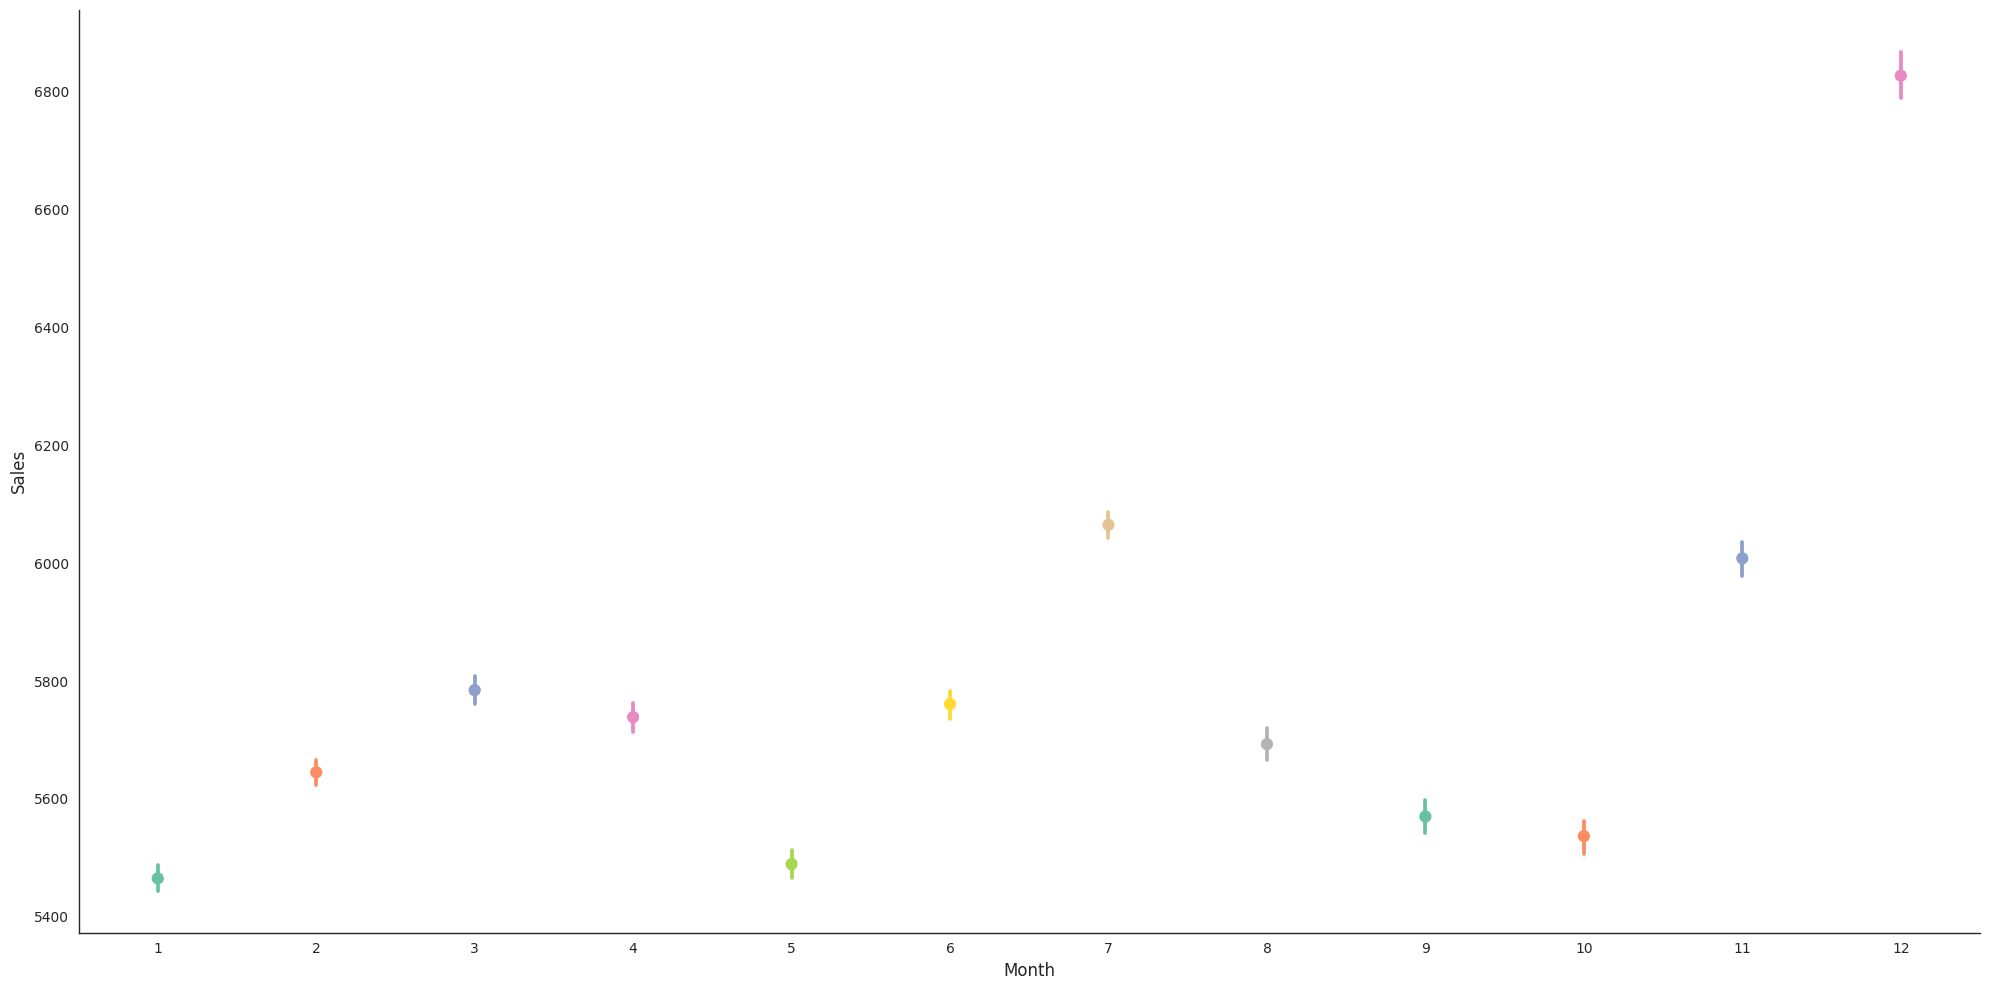

In [ ]:
custom_palette = sns.color_palette("Set2")
sns.catplot(x="Month", y="Sales", data=rossman_df, kind="point", aspect=2, height=10 , palette= custom_palette)

In [ ]:
# Value Counts of SchoolHoliday Column
rossman_df.SchoolHoliday.value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

**As we can see in the Piechart Sales affected by School Holiday is 18% and Mainly Sales aren't afffected by School Holiday**

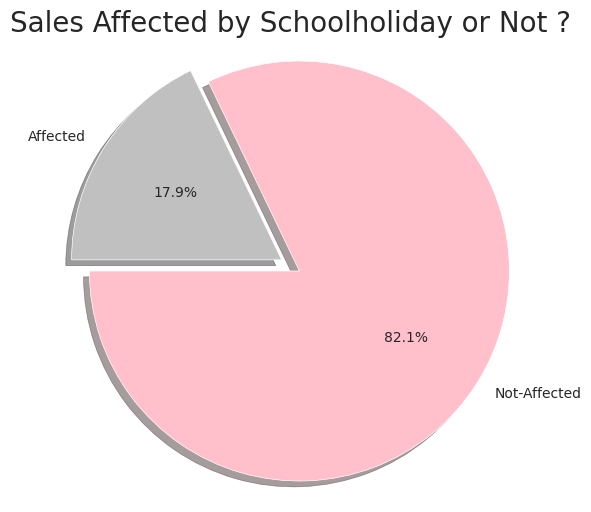

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.SchoolHoliday.value_counts()
colors = ['pink', 'silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Transforming Variable StateHoliday**

In [ ]:
rossman_df["StateHoliday"] = rossman_df["StateHoliday"].map({0: 0, "0": 0, "a": 1, "b": 1, "c": 1})

In [ ]:
rossman_df.StateHoliday.value_counts()

0    986159
1     31050
Name: StateHoliday, dtype: int64

**As we can see in the Piechart Sales affected by State Holiday is only 3% means Sales aren't afffected by State Holiday**

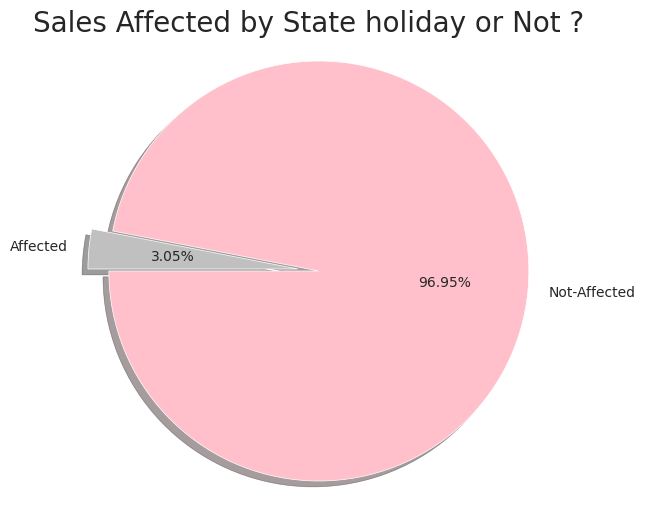

In [ ]:
labels = 'Not-Affected' , 'Affected'
sizes = rossman_df.StateHoliday.value_counts()
colors = ['pink','silver']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.2f%%' , shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by State holiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

**As Sales isn't much affected by State Holiday so i'm removing this column**

In [ ]:
rossman_df.drop('StateHoliday',inplace=True,axis=1)

**Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.**

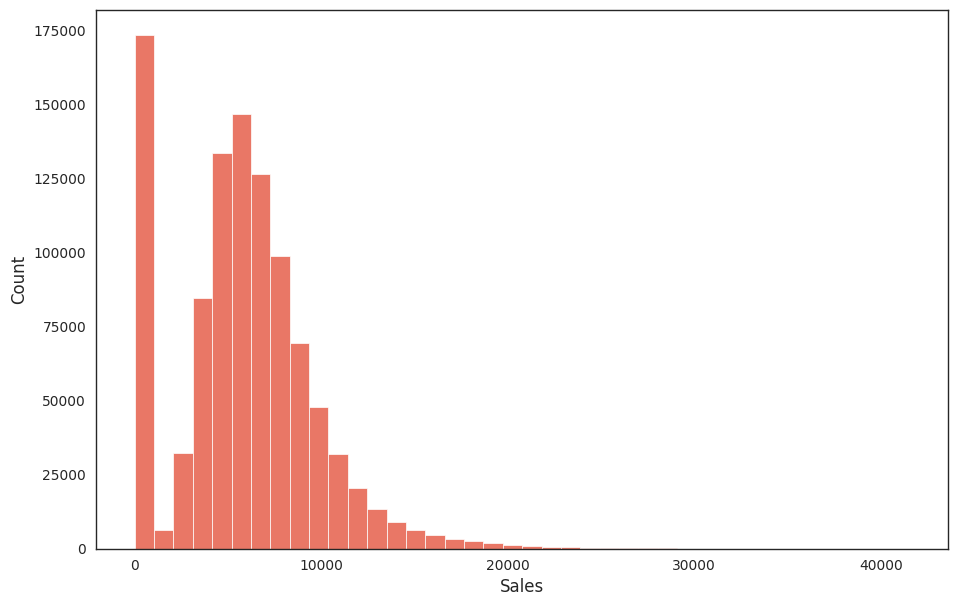

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(rossman_df['Sales'], kde = False,bins=40);

**Sales vs Customers**

<Axes: xlabel='Sales', ylabel='Customers'>

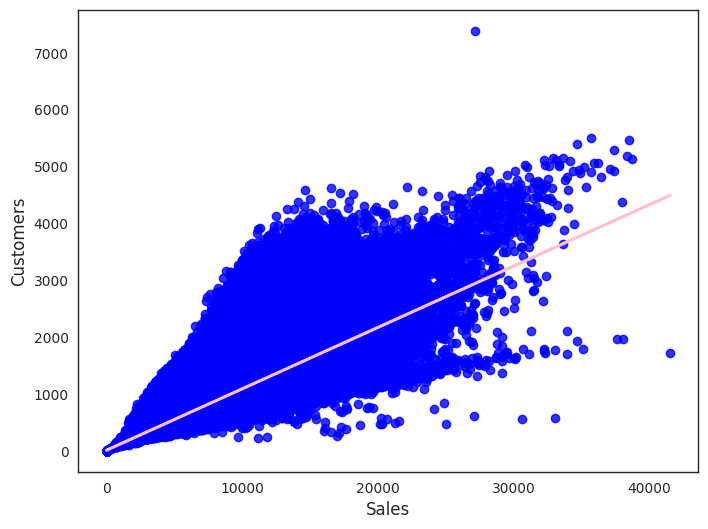

In [ ]:
#linear relation between sales and customers
sns.regplot(x='Sales', y='Customers', data=rossman_df, scatter_kws={'color': 'blue'}, line_kws={'color': 'pink'})

## **Analysing the Store Dataset**

In [ ]:
store_df.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [ ]:
store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


##### **Checking Information about Dataset**

In [ ]:
store_df.shape

(1115, 10)

In [ ]:
#Checking info of data as data types and rows and cols
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [ ]:
#Checking Null Values
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

**Heatmap for null values**

<Figure size 1000x600 with 0 Axes>

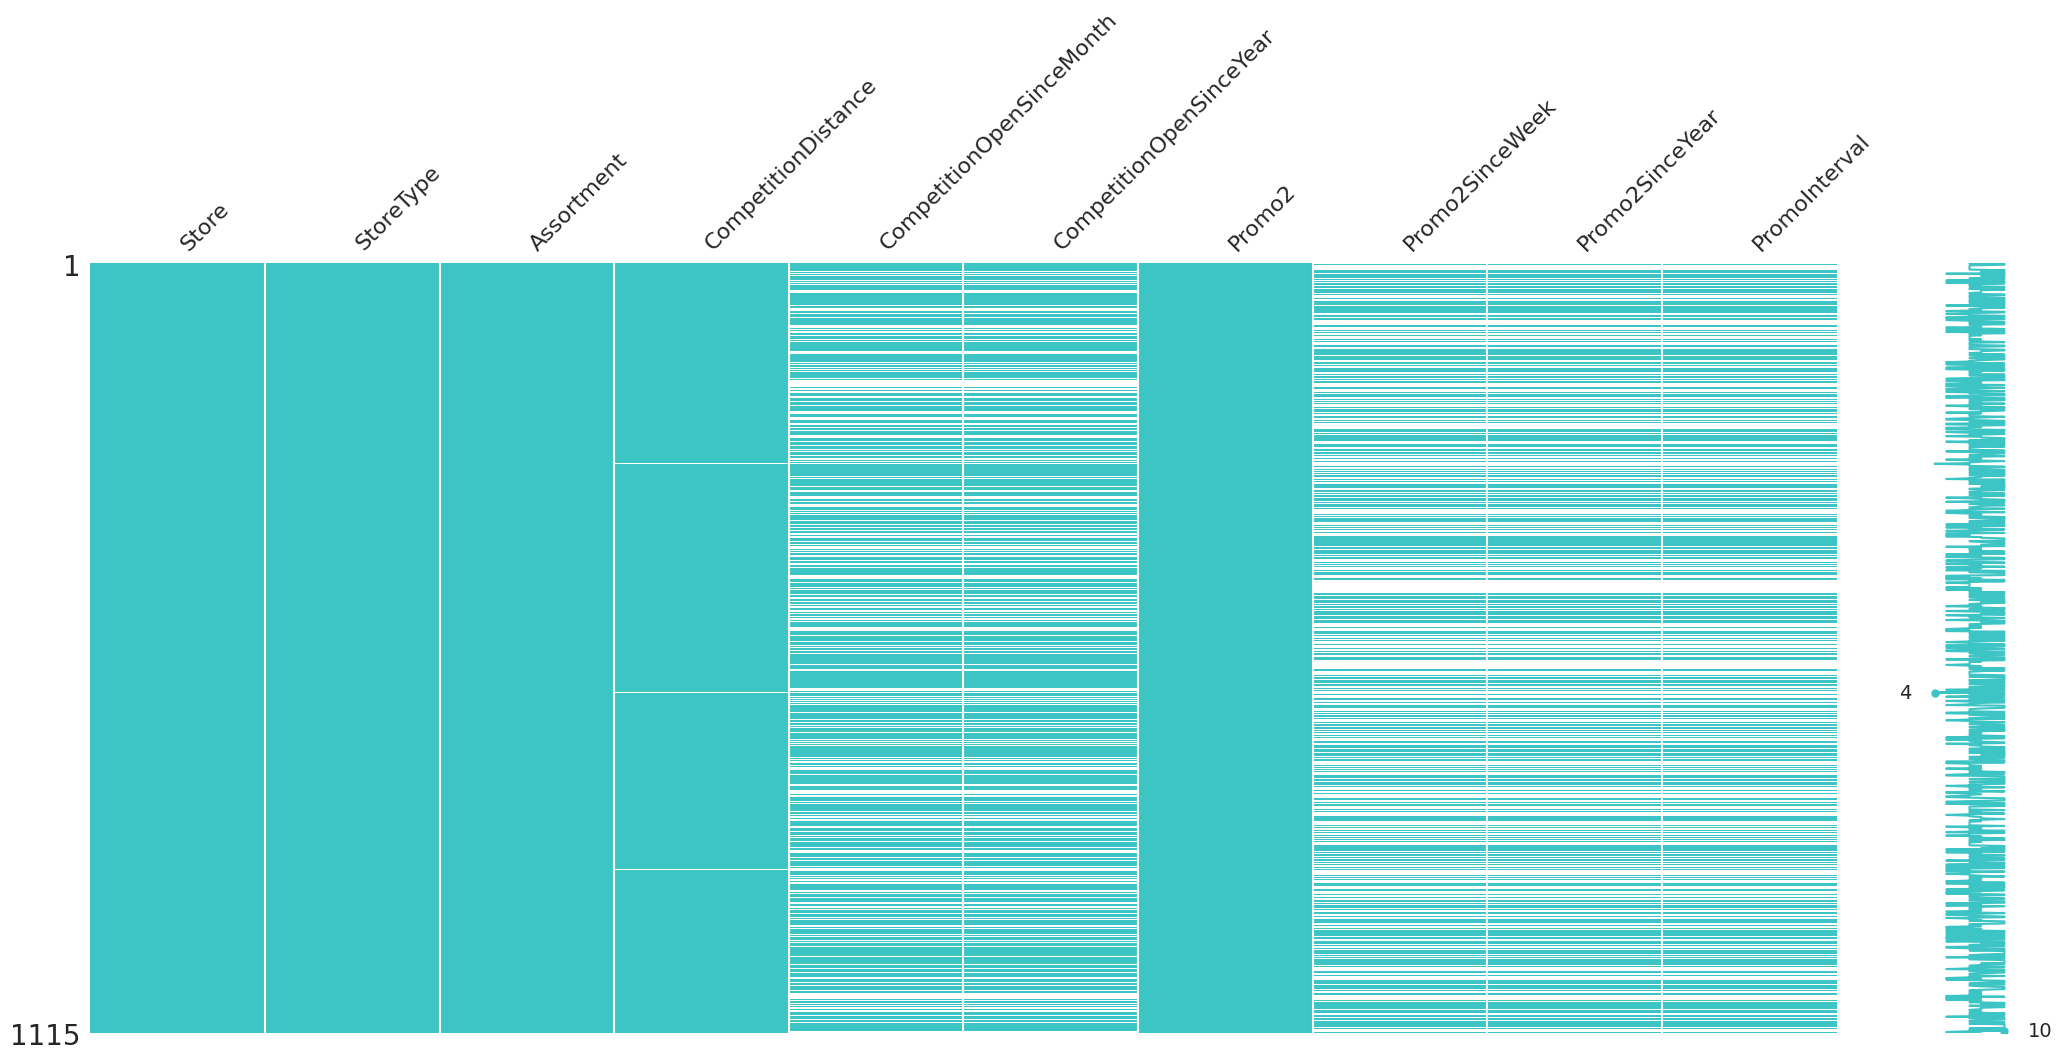

In [ ]:
plt.figure(figsize=(10, 6))
msno.matrix(store_df, color=(0.24, 0.77, 0.77))
plt.show()

**Distribution Of Different Store Types**

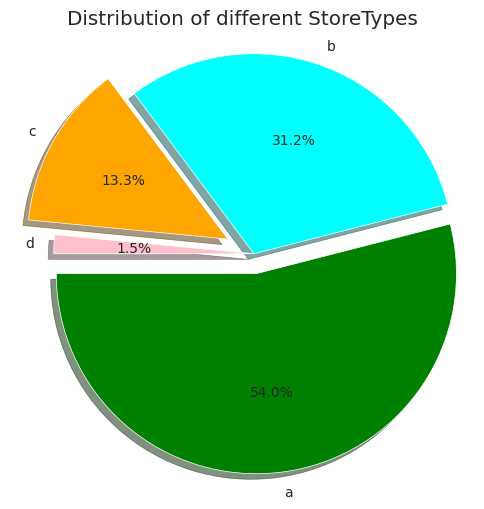

In [ ]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_df.StoreType.value_counts()
colors = ['green', 'cyan' , 'orange' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()


### **Remove features with high percentages of missing values**

#### **we can see that some features have a high percentage of missing values and they won't be accurate as indicators, so we will remove features with more than 30% missing values.**

In [ ]:
# remove features
store_df = store_df.drop(['CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek',
                     'Promo2SinceYear', 'PromoInterval'], axis=1)

#### **Replace missing values in features with low percentages of missing values**

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

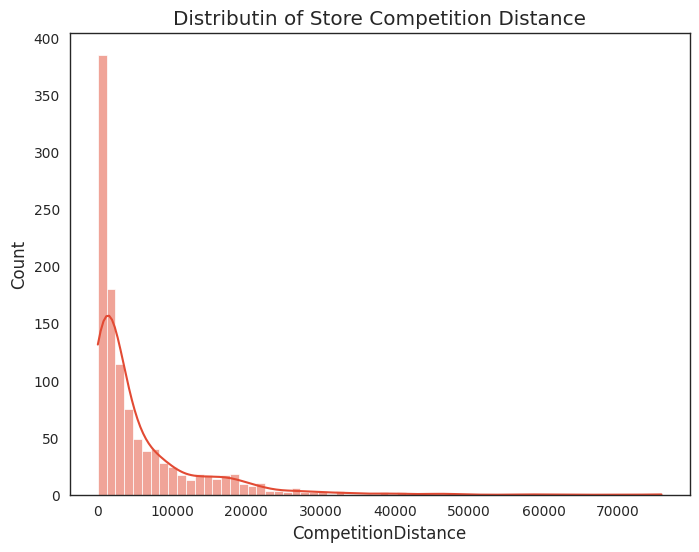

In [ ]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.histplot(store_df.CompetitionDistance.dropna(), kde=True)
plt.title("Distributin of Store Competition Distance")

#### **The distribution is right skewed, so we'll replace missing values with the median.**

In [ ]:
# replace missing values in CompetitionDistance with median for the store dataset

store_df.CompetitionDistance.fillna(store_df.CompetitionDistance.median(), inplace=True)

**Pairplot for Store Dataset**

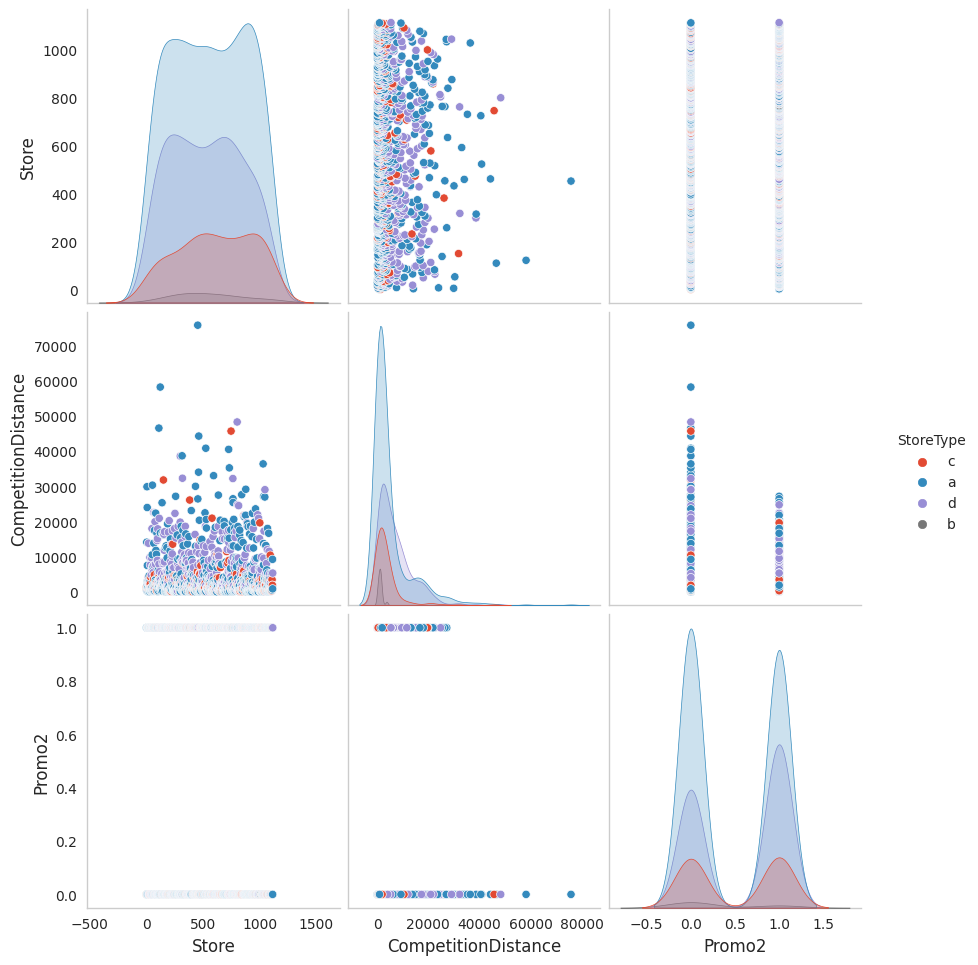

In [ ]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_df,hue='StoreType')
pp.fig.set_size_inches(10,10);

**Checking stores with their assortment type**

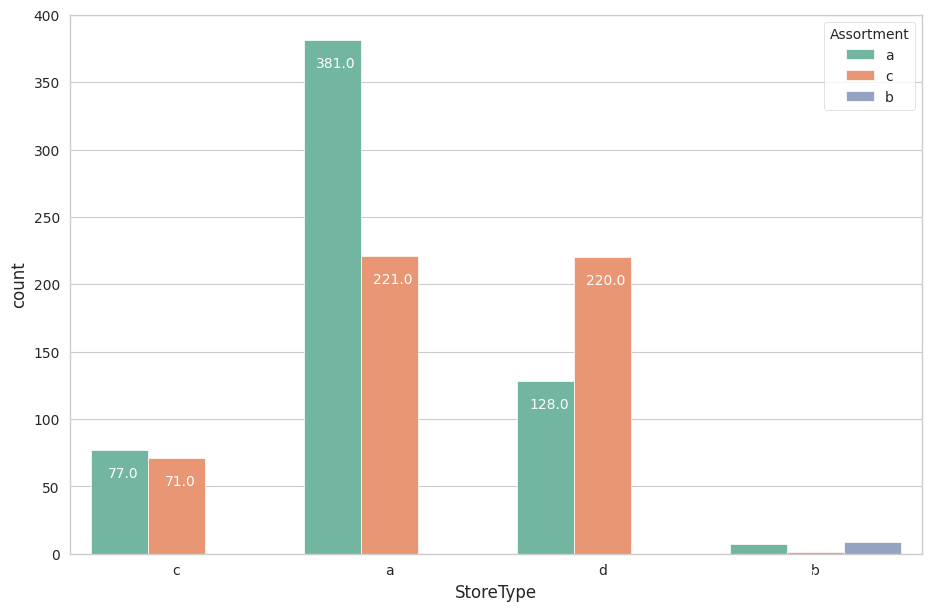

In [ ]:
#checking stores with their assortment type
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_df,palette=custom_palette)

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

***We can see that there is not such significant differences in these 3 years in terms of sales.***

<ipython-input-168-9ff5169f9be8>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 , palette = custom_palette )
<ipython-input-168-9ff5169f9be8>:2: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 , palette = custom_palette )


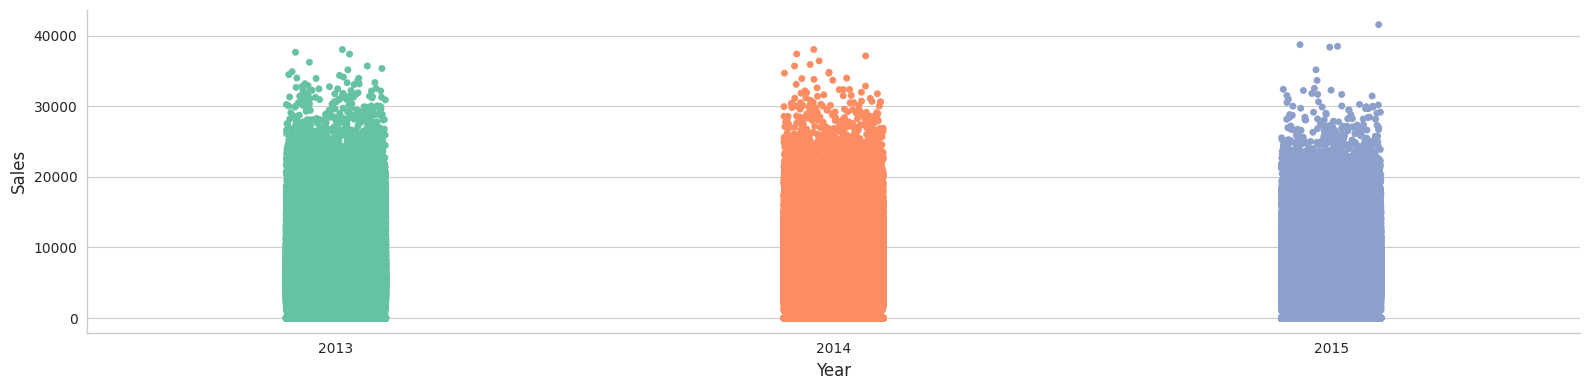

In [ ]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=rossman_df, height=4, aspect=4 , palette = custom_palette )

### **Merging Two Datasets**

In [ ]:
df = pd.merge(rossman_df, store_df, how='left', on='Store')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [ ]:
df.shape

(1017209, 16)

## **EDA On Merged Dataset**

#### **Heatmap Of Merged Dataset**

<ipython-input-171-e5ec343ee9e1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = df.corr()


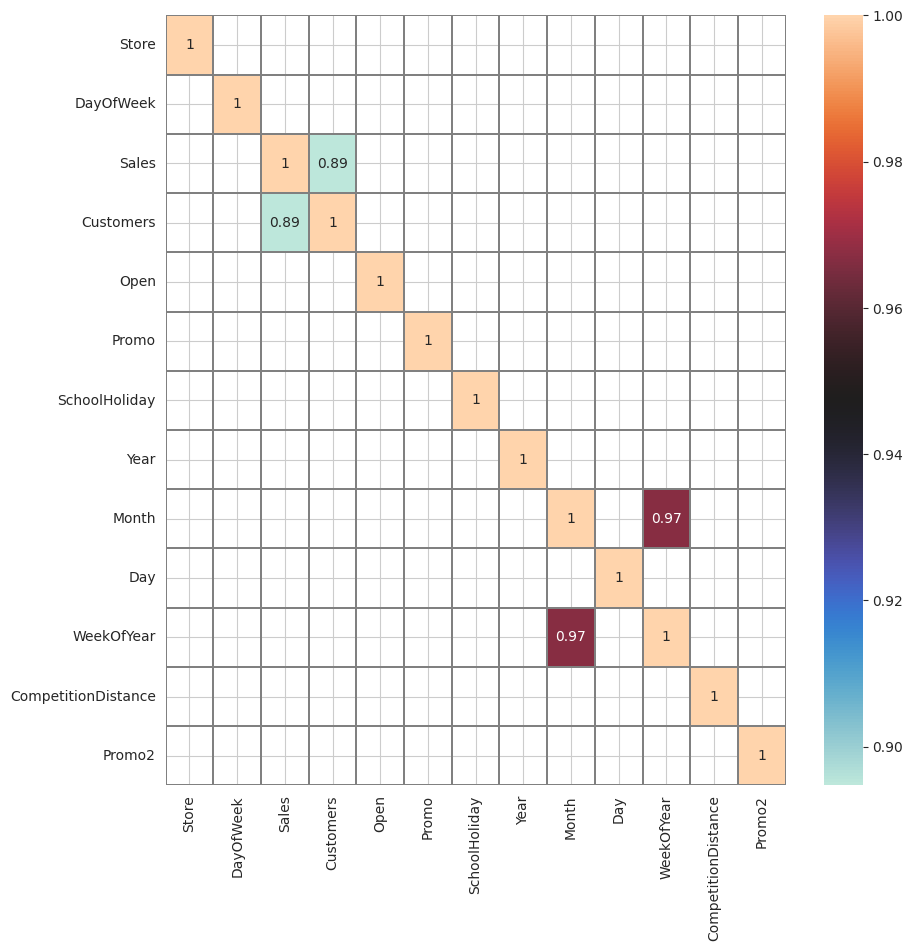

In [ ]:
plt.figure(figsize=(10,10))
df_corr = df.corr()
mask = df_corr.where(abs(df_corr)>=.70).isna()
sns.heatmap(df_corr ,mask = mask , annot = True , cmap ='icefire', linewidth = 0.2, linecolor = 'grey').set_facecolor('white')

In [ ]:
df["Avg_Customer_Sales"] = df.Sales/df.Customers

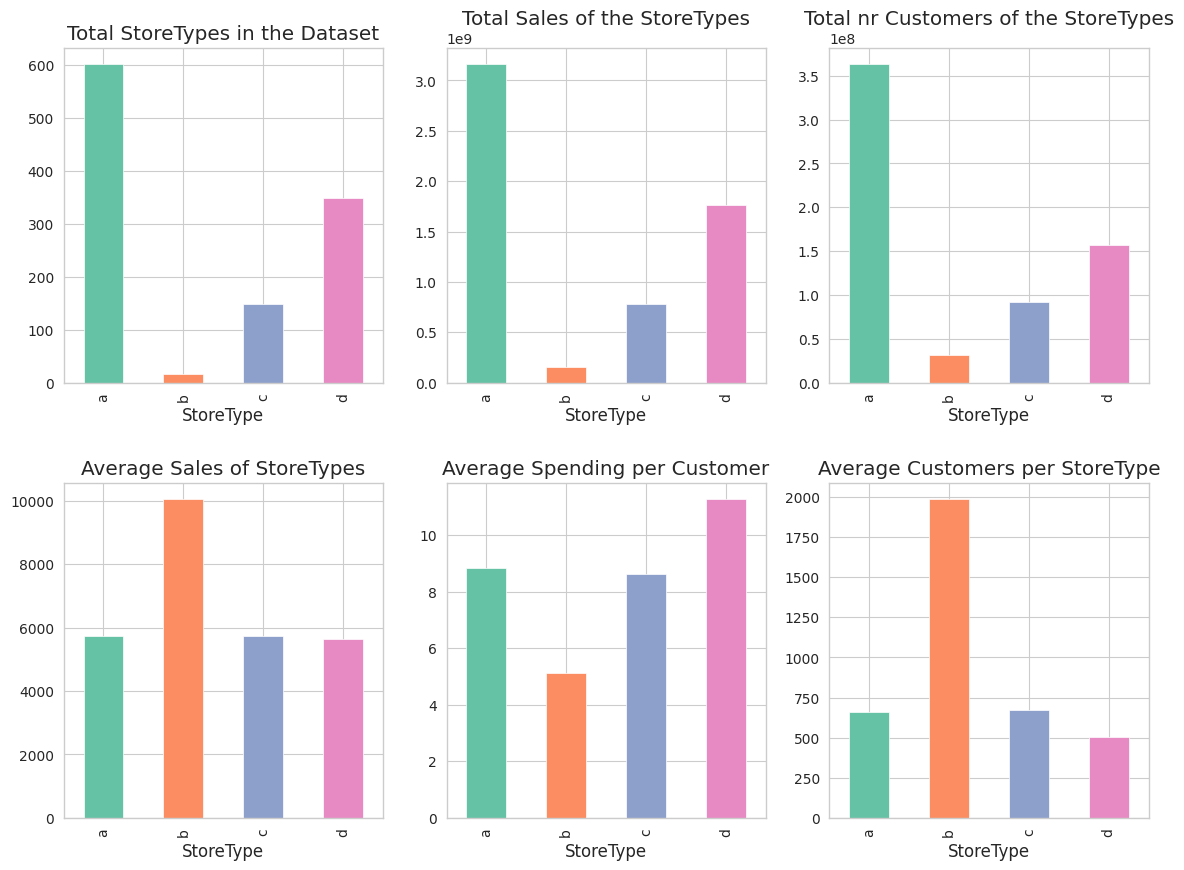

In [ ]:
f, ax = plt.subplots(2, 3, figsize = (14,10))

store_df.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset", color= custom_palette)
df.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes" , color= custom_palette)
df.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes", color= custom_palette)
df.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes", color= custom_palette)
df.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer", color= custom_palette)
df.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType", color= custom_palette)

plt.subplots_adjust(hspace = 0.3)
plt.show()

**As we can see from the graphs, the StoreType A has the most stores, sales and customers. However the StoreType D has the best averages spendings per customers. StoreType B, with only 17 stores has the most average customers.**

#### **Lets go ahead with the promotions**

<Figure size 1000x1000 with 0 Axes>

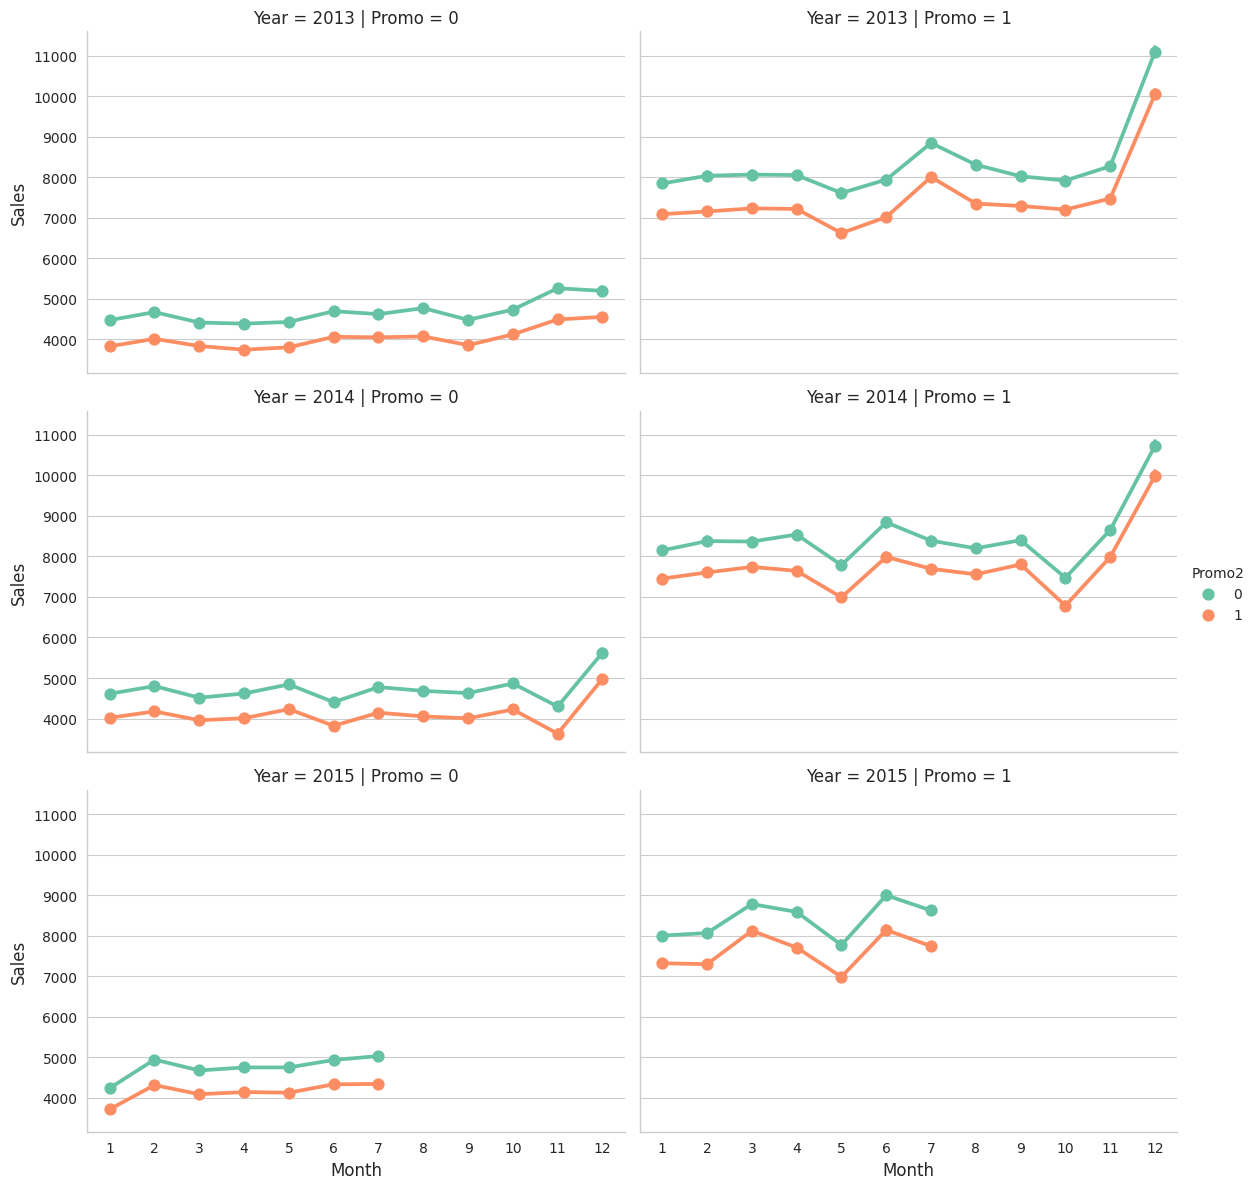

In [ ]:
plt.figure(figsize=(10,10))
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind="point", height=4, aspect=1.5 , palette=custom_palette)

plt.show()
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend.

**As We can see that when the promo is running Sales are high**

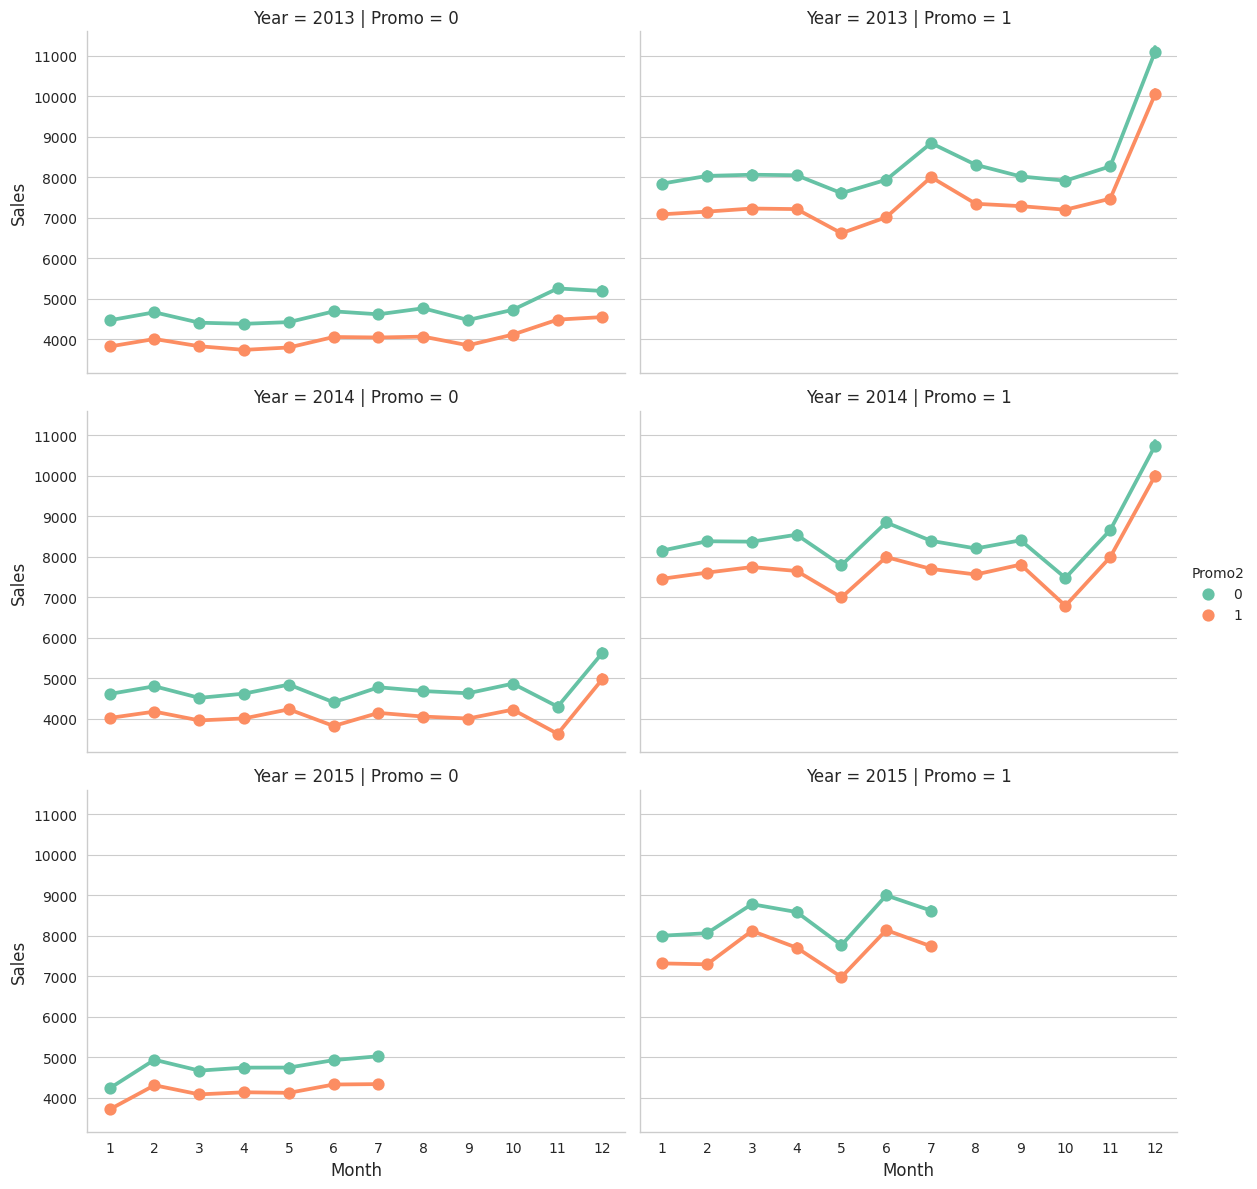

In [ ]:
sns.catplot(data=df, x="Month", y="Sales", col='Promo', hue='Promo2', row="Year", kind="point", height=4, aspect=1.5, palette= custom_palette)

In [ ]:
print("""So, no promotion in the weekend. However, the sales are very high, if the stores have promotion.
The Sales are going crazy on Sunday. No wonder.""")
print("There are", df[(df.Open == 1) & (df.DayOfWeek == 7)].Store.unique().shape[0], "stores opend on sundays")

So, no promotion in the weekend. However, the sales are very high, if the stores have promotion.
The Sales are going crazy on Sunday. No wonder.
There are 33 stores opend on sundays


**What about the Competition Distance. What kind of inpact does this have on the sales.**

In [ ]:
df.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
df["CompetitionDistance_Cat"] = pd.cut(df["CompetitionDistance"], 5)

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

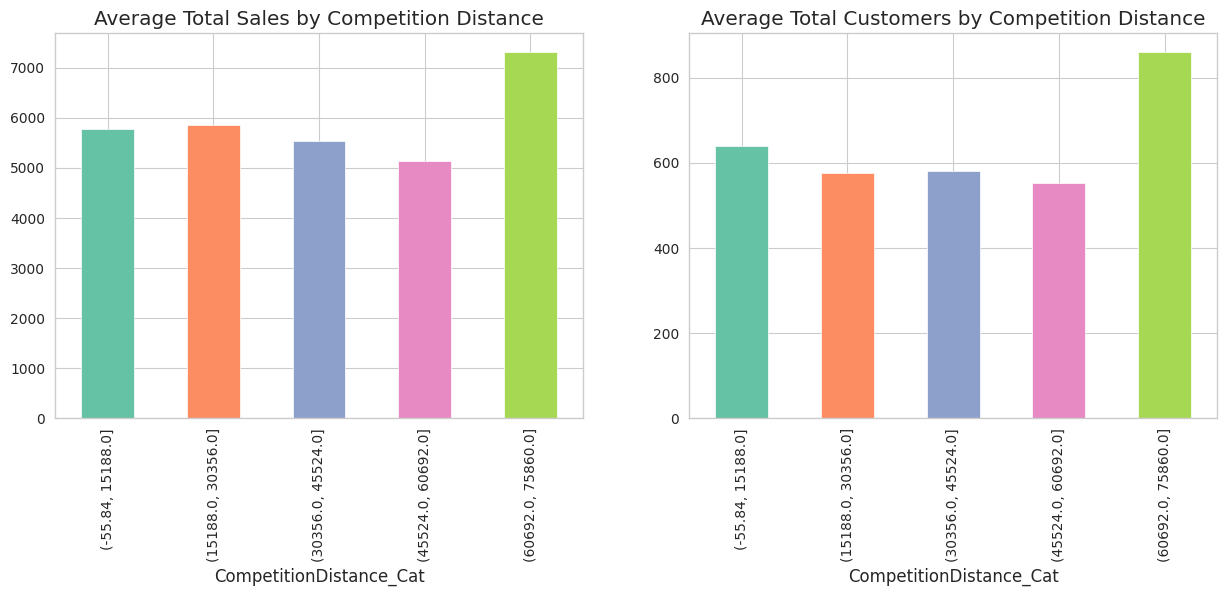

In [ ]:
f, ax = plt.subplots(1,2, figsize = (15,5))

df.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0], color = custom_palette)
df.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1] , color = custom_palette)

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [ ]:
df.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

**Box plot shows that we have a very high outliers in sales**

<Axes: >

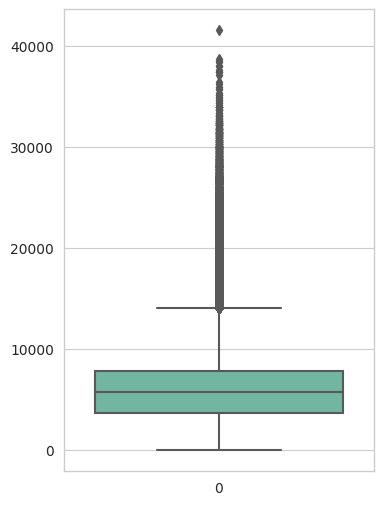

In [ ]:
#checking outliers in sales
plt.figure(figsize=(4,6))
sns.boxplot(rossman_df['Sales'], palette = custom_palette)

**Removing Outliers Of Sales Column**

In [ ]:
def remove_outlier(df_in, col_name):
    z_scores = zscore(df_in[col_name])
    df_out = df_in[(z_scores > -1.5) & (z_scores < 1.5)]  # Adjust the z-score threshold as needed
    return df_out

df_no_outliers = remove_outlier(df, 'Sales')

<Axes: >

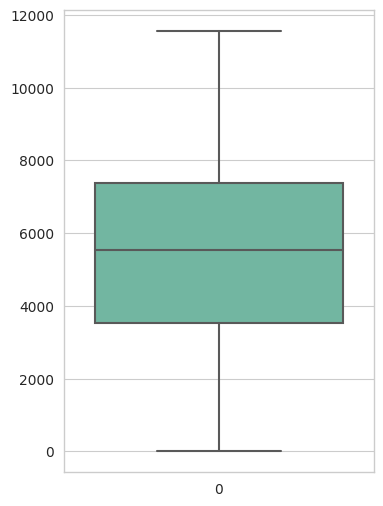

In [ ]:
#checking outliers in sales
plt.figure(figsize=(4,6))
sns.boxplot(df_no_outliers['Sales'], palette = custom_palette)

# **Conclusion of the analysis:**

**Sales are highly correlated to number of Customers.**

**The most selling and crowded store type is A.**

**StoreType B has the lowest Average Sales per Customer. So i think customers visit this type only for small things.**

**StoreTybe D had the highest buyer cart.**

**Promo runs only in weekdays.**

**For all stores, Promotion leads to increase in Sales and Customers both.**

**More stores are opened during School holidays than State holidays.**

**The stores which are opened during School Holiday have more sales than normal days.**

**Sales are increased during Chirstmas week, this might be due to the fact that people buy more beauty products during a Christmas celebration.**

**Promo2 doesnt seems to be correlated to any significant change in the sales amount.**

**Absence of values in features CompetitionOpenSinceYear/Month doesn’t indicate the absence of competition as CompetitionDistance values are not null where the other two values are null.**

### **Drop Subsets Of Data Where Might Cause Bias**

In [ ]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
df = df[df.Open != 0]

In [ ]:
# Open isn't a variable anymore, so we'll drop it too
df = df.drop('Open', axis=1)

In [ ]:
# Check if there's any opened store with zero sales
df[df.Sales == 0]['Store'].sum()

31460

In [ ]:
# see the percentage of open stored with zero sales
df[df.Sales == 0]['Sales'].sum()/df.Sales.sum()

0.0

In [ ]:
# remove this part of data to avoid bias
df = df[df.Sales != 0]

In [ ]:
df_new=df.copy()

In [ ]:
df_new = pd.get_dummies(df_new,columns=['StoreType','Assortment'])

In [ ]:
df_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,SchoolHoliday,Year,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,2015-07-31,5263,555,1,1,2015,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,2,5,2015-07-31,6064,625,1,1,2015,7,31,31,570.0,1,1,0,0,0,1,0,0
2,3,5,2015-07-31,8314,821,1,1,2015,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,4,5,2015-07-31,13995,1498,1,1,2015,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,5,2015-07-31,4822,559,1,1,2015,7,31,31,29910.0,0,1,0,0,0,1,0,0


**From plot it can be sen that most of the sales have been on 1st and last day of week**

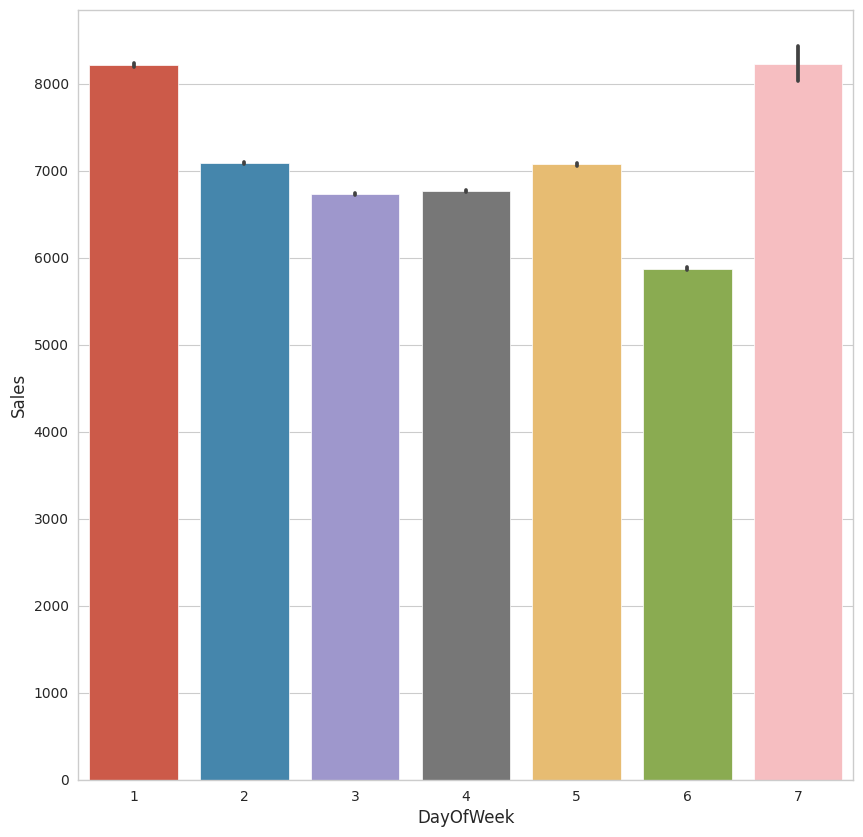

In [ ]:
#plot for sales in terms of days ofthe week
plt.figure(figsize=(10,10))
sns.barplot(x='DayOfWeek', y='Sales' ,data=df_new);

#### **Setting Features and Target Variables**

In [ ]:
X = df_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= df_new.Sales

In [ ]:
X.shape

(844338, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,WeekOfYear,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

#### **Splitting Dataset Into Training Set and Test Set**

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

## **Implementing Supervised Machine Learning algorithms.**

## Util Functions

In [ ]:
#Util Functions
results_dict = {}
def evaluate_and_print_results(y_true, y_pred, model_name):
    rmse = sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    mape_error = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{model_name} RMSE: {rmse}")
    print(f"{model_name} R^2 Score: {r2}")
    print(f"{model_name} MAPE Score: {mape_error}")
    print("\n")

    # Append results to the dictionary
    results_dict[model_name] = {
        'RMSE': rmse,
        'R^2 Score': r2,
        'MAPE Score' : mape_error
    }

def plot_predictions(y_true, y_pred, model_name):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_true, y=y_pred,palette=custom_palette)
    plt.title(f"{model_name} - True vs Predicted Values")
    plt.xlabel("True Values")
    plt.ylabel("Predicted Values")
    plt.show()

## Linear Regresssion

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)
y_pred_linear_reg = linear_reg_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_linear_reg, linear_reg_model)
# plot_predictions(y_test, y_pred_linear_reg, linear_reg_model)

LinearRegression() RMSE: 1307.0283156205628
LinearRegression() R^2 Score: 0.8225339320206451
LinearRegression() MAPE Score: 0.1455914792408436




## Lasso Regression

In [ ]:
param_grid_lasso = {
    'alpha': [0.01, 0.1, 1, 10]
}
grid_search_lasso = GridSearchCV(Lasso(), param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso_model = grid_search_lasso.best_estimator_
y_pred_lasso = best_lasso_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_lasso, best_lasso_model)
# plot_predictions(y_test, y_pred_lasso, best_lasso_model)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.724e+11, tolerance: 4.548e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.934e+11, tolerance: 4.553e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.887e+11, tolerance: 4.557e

Lasso(alpha=0.01) RMSE: 1307.0272605250618
Lasso(alpha=0.01) R^2 Score: 0.8225342185386524
Lasso(alpha=0.01) MAPE Score: 0.14559078298268105




## Ridge Regression

In [ ]:
param_grid_ridge = {
    'alpha': [0.01, 0.1, 1, 10]
}

grid_search_ridge = GridSearchCV(Ridge(), param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge_model = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_ridge, best_ridge_model)
# plot_predictions(y_test, y_pred_ridge, best_ridge_model)

Ridge(alpha=1) RMSE: 1307.0277721021237
Ridge(alpha=1) R^2 Score: 0.8225340796166214
Ridge(alpha=1) MAPE Score: 0.14559123726823772




## Polynomial Regression

In [ ]:
poly_model = make_pipeline(PolynomialFeatures(degree=2), Ridge())
poly_model.fit(X_train, y_train)
y_pred_poly = poly_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_poly, "Polynomial Regression(Degree-2)")
# plot_predictions(y_test, y_pred_poly, "Polynomial Regression(Degree-2)")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.07606e-23): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Polynomial Regression(Degree-2) RMSE: 1119.7937616584109
Polynomial Regression(Degree-2) R^2 Score: 0.8697368962370239
Polynomial Regression(Degree-2) MAPE Score: 0.12615731611684922




## Logistic Regresssion

In [ ]:
# logistic_model = LogisticRegression(max_iter=20)
# logistic_model.fit(X_train, y_train)
# y_pred_logistic = logistic_model.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_logistic, "Logistic Regression")
# plot_predictions(y_test, y_pred_logistic, "Logistic Regression")

## Decision Tree

In [ ]:
param_grid_decision_tree = {
    'max_depth': [20],
    'min_samples_split': [10],
    'min_samples_leaf': [4]
}
# WE have searched best hyperparamters in previous iterations.
grid_search_decision_tree = GridSearchCV(DecisionTreeRegressor(), param_grid_decision_tree, cv=5, scoring='neg_mean_squared_error')
grid_search_decision_tree.fit(X_train, y_train)
best_decision_tree_model = grid_search_decision_tree.best_estimator_
y_pred_decision_tree = best_decision_tree_model.predict(X_test)
evaluate_and_print_results(y_test, y_pred_decision_tree, best_decision_tree_model)
# plot_predictions(y_test, y_pred_decision_tree, best_decision_tree_model)

DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) RMSE: 732.4462863659762
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) R^2 Score: 0.9442689921248022
DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10) MAPE Score: 0.07001406634989729




## Random Forest Regressor : We are not running below cell , due to low computational machine.

In [ ]:
# param_grid_random_forest = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# WE have searched best hyperparamters in previous iterations.

# grid_search_random_forest = GridSearchCV(RandomForestRegressor(), param_grid_random_forest, cv=5, scoring='neg_mean_squared_error')
# grid_search_random_forest.fit(X_train, y_train)
# best_random_forest_model = grid_search_random_forest.best_estimator_
# y_pred_random_forest = best_random_forest_model.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_random_forest, best_random_forest_model)
# plot_predictions(y_test, y_pred_random_forest, best_random_forest_model)

In [ ]:
# WE have searched best hyperparamters in previous iterations.
# { n_estimators=80,min_samples_split=2,min_samples_leaf=1,max_depth=None }

rf = RandomForestRegressor(n_estimators=80,min_samples_split=2, min_samples_leaf=1,max_depth=None,n_jobs=-1)
rfreg = rf.fit(X_train, y_train)
y_pred_random_forest = rfreg.predict(X_test)
evaluate_and_print_results(y_test, y_pred_random_forest, "Random Forest(n_estimator=80)")
# plot_predictions(y_test, y_pred_random_forest, best_random_forest_model)

Random Forest(n_estimator=80) RMSE: 583.7162698536175
Random Forest(n_estimator=80) R^2 Score: 0.9646044282919243
Random Forest(n_estimator=80) MAPE Score: 0.057030491787934456




## K-Nearest Neighbors : We are not running below cell , due to low computational machine.

In [ ]:
# param_grid_knn = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]
# }

# grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid_knn, cv=5, scoring='neg_mean_squared_error')
# grid_search_knn.fit(X_train, y_train)
# best_knn_model = grid_search_knn.best_estimator_
# y_pred_knn = best_knn_model.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_knn, best_knn_model)
# plot_predictions(y_test, y_pred_knn, best_knn_model)

## Support Vector Regressor : We are not running below cell , due to low computational machine.

In [ ]:
# from sklearn.svm import SVR
# param_grid_svr = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#     'gamma': ['scale', 'auto']
# }

# grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error')
# grid_search_svr.fit(X_train, y_train)
# best_svr_model = grid_search_svr.best_estimator_
# y_pred_svr = best_svr_model.predict(X_test)
# evaluate_and_print_results(y_test, y_pred_svr, best_knn_model)
# plot_predictions(y_test, y_pred_svr, best_knn_model)


In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

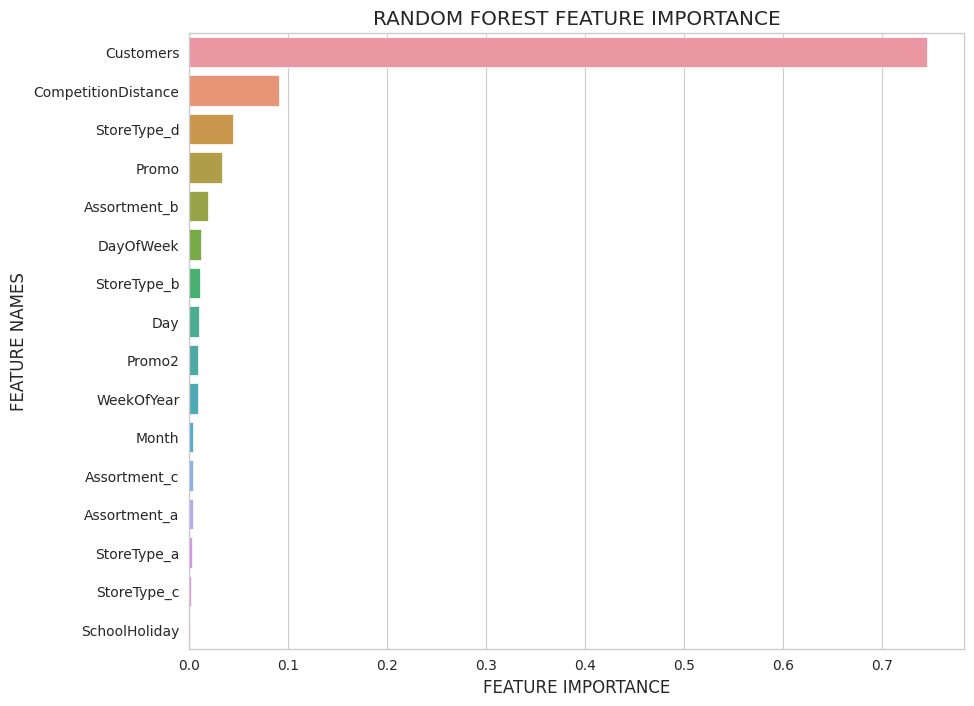

In [ ]:
plot_feature_importance(rfreg.feature_importances_,columns[:],'RANDOM FOREST')

# **Conclusion**

In [ ]:
results_df = pd.DataFrame(results_dict).transpose()
results_df

,RMSE,R^2 Score,MAPE Score
LinearRegression(),1307.028316,0.822534,0.145591
Lasso(alpha=0.01),1307.027261,0.822534,0.145591
Ridge(alpha=1),1307.027772,0.822534,0.145591
Polynomial Regression(Degree-2),1119.793762,0.869737,0.126157
"DecisionTreeRegressor(max_depth=20, min_samples_leaf=4, min_samples_split=10)",732.446286,0.944269,0.070014
Random Forest(n_estimator=80),583.716270,0.964604,0.057030


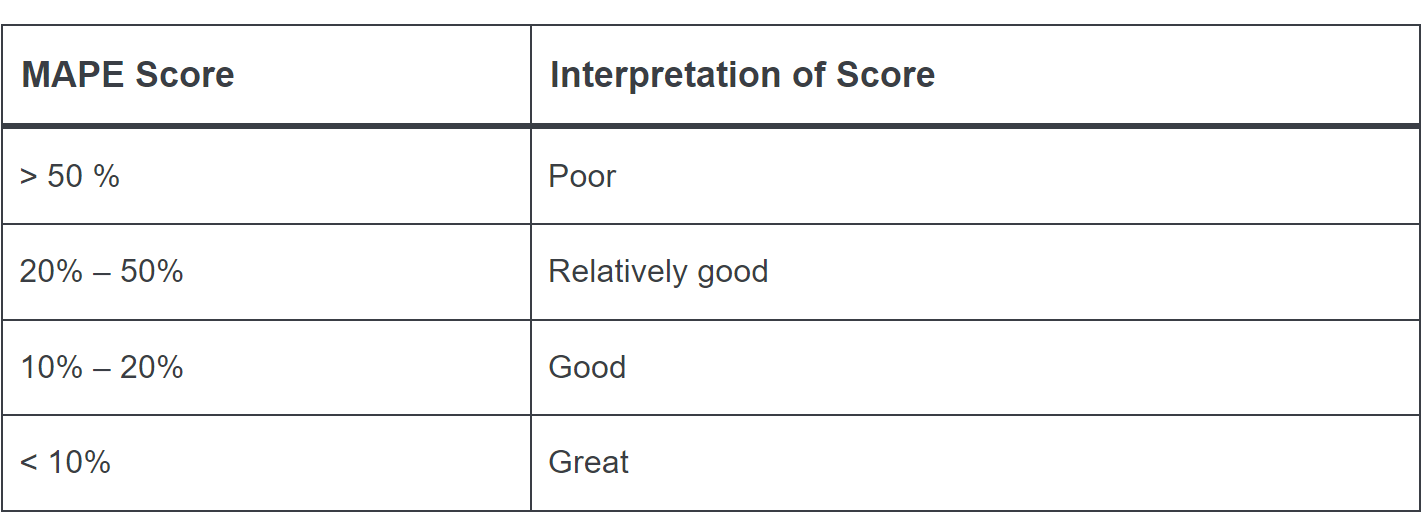

We can conclude that Random Forest Regressor is best model among the all models for our task